In [1]:
from sympy import Product, Sum, log, Symbol, symbols, IndexedBase, expand_log
import matplotlib.pyplot as plt
import numpy as np

# 1. Maliyet

## 1.a.



$$y = Bernoulli(f(X))$$

varsayimi icin, likelihood ifadesini elde ediniz.

In [4]:
from sympy import Product, Symbol, IndexedBase
p = Symbol('p')
n = Symbol('n', integer=True)
x = IndexedBase('x')
i = Symbol('i', integer=True)
L = Product(p**x[i]*(1-p)**(1-x[i]), (i, 1, n))
L.doit()

p**Sum(x[i], (i, 1, n))*(1 - p)**Sum(1 - x[i], (i, 1, n))

In [ ]:
# Bu sonuç aslında olasılık kuramında kullanılan bir formül olan Bernoulli dağılımının olabilirlik fonksiyonudur. Bu fonksiyon, bağımsız ve aynı dağılıma sahip olan 
# Bernoulli denemelerinin sonucunda başarı sayısının olasılığını hesaplamak için kullanılır5. Örneğin, bir madeni para atışında yazı gelme olasılığı p ise, n atışta x kez 
# yazı gelme olasılığı L.doit () ile hesaplanabilir. Burada f(X) yerine p kullanılmıştır. Bu değişiklik, f(X)'in sabit bir değer olduğunu varsaydığımız için yapılabilir. 
# Eğer f(X) bir fonksiyon ise, o zaman p yerine f(X) yazmak gerekir.

Sorunun cevabını vermek için, Bernoulli dağılımının olasılık kütle fonksiyonunu kullanacağım. Bu fonksiyon şöyledir:
$$P(y|f(X)) = f(X)^y (1-f(X))^{1-y}$$

Burada y 0 veya 1 olabilir ve f(X) bir bağımsız değişken X’in bir fonksiyonudur.
Likelihood ifadesi ise verilen f(X)'e göre y’nin olasılığını maksimize eden fonksiyondur. Bu nedenle, likelihood ifadesi şöyle yazılabilir:
$$L(f(X)|y) = \prod_{i=1}^n P(y_i|f(X_i))$$
Burada n veri noktası sayısıdır.
Likelihood ifadesini daha kolay çalışmak için log-likelihood olarak da yazabiliriz:
$$\log L(f(X)|y) = \sum_{i=1}^n \log P(y_i|f(X_i))$$
Bu ifadeyi açarsak şunu elde ederiz:
$$\log L(f(X)|y) = \sum_{i=1}^n [y_i \log f(X_i) + (1-y_i) \log (1-f(X_i))]$$
Bu, sorunuzun cevabıdır.

Verdiğim iki cevap arasındaki ilişkiyi izah etmeye çalışacağım. Öncelikle, verdiğiniz kod parçası, sympy modülünü kullanarak likelihood ifadesini sembolik olarak tanımlayan ve değerlendiren bir koddur. Bu kodda, f(X) yerine p sembolü kullanılmıştır.


In [10]:
L

Product(p**x[i]*(1 - p)**(1 - x[i]), (i, 1, n))

In [12]:
L.doit()

p**Sum(x[i], (i, 1, n))*(1 - p)**Sum(1 - x[i], (i, 1, n))

Bu sembol, Bernoulli dağılımının başarı olasılığını temsil eder. Kodun sonucu şöyledir:
$$L(p|x) = p{\sum_{i=1}n x_i} (1-p){\sum_{i=1}n (1-x_i)}$$
Bu sonuç, likelihood ifadesinin bir başka şeklidir. Burada x_i değerleri y_i değerlerine eşittir. Yani x_i = 1 ise y_i = 1 ve x_i = 0 ise y_i = 0 demektir. Bu durumda, likelihood ifadesini şöyle yazabiliriz:
$$L(p|y) = p{\sum_{i=1}n y_i} (1-p){\sum_{i=1}n (1-y_i)}$$
Bu ifadeyi log-likelihood olarak yazmak için doğal logaritma alırız:
$$\log L(p|y) = \sum_{i=1}^n y_i \log p + \sum_{i=1}^n (1-y_i) \log (1-p)$$
Bu ifadeyi daha da basitleştirmek için toplamları birleştiririz:
$$\log L(p|y) = \sum_{i=1}^n [y_i \log p + (1-y_i) \log (1-p)]$$
Bu ifade, verdiğim ikinci cevap ile aynıdır. Burada f(X) yerine p kullanılmıştır. Bu değişiklik, f(X)'in sabit bir değer olduğunu varsaydığımız için yapılabilir. Eğer f(X) bir fonksiyon ise, o zaman p yerine f(X) yazmak gerekir.

## 1.b.

Yukarida elde etmis oldugunuz likelihood ifadesinden yola cikarak, tasniflendirme icin **maliyet** fonksiyonunu yaziniz.

Tasniflendirme için maliyet fonksiyonunu yazmak için, öncelikle verilen y değerlerinin 0 veya 1 olduğunu varsayacağım. Bu durumda, Bernoulli dağılımının olasılık kütle fonksiyonunu kullanarak likelihood ifadesini yazabiliriz:

$$L(f(X)|y) = \prod_{i=1}^n P(y_i|f(X_i))$$

$$L(f(X)|y) = \prod_{i=1}^n f(X_i)^{y_i} (1-f(X_i))^{1-y_i}$$

Burada f(X) bir rassal değişkenin aldığı değerdir ve y ise bu değerin başarı veya başarısızlık olarak tanımlanan sonucudur. y = 1 ise başarı, y = 0 ise başarısızlık anlamına gelir.

Maliyet fonksiyonu ise, likelihood ifadesinin negatif logaritması olarak tanımlanır. Maliyet fonksiyonu, modelin ne kadar iyi tahmin yaptığını ölçer. Maliyet fonksiyonu ne kadar küçükse, model o kadar iyi tahmin yapar. Maliyet fonksiyonu şöyle yazılabilir:

$$C(f(X)|y) = -\log L(f(X)|y)$$

$$C(f(X)|y) = -\sum_{i=1}^n [y_i \log f(X_i) + (1-y_i) \log (1-f(X_i))]$$

Bu formül, log loss veya cross entropy loss olarak da bilinir. Bu formülü minimize etmek için gradient descent gibi optimizasyon yöntemleri kullanılabilir.


## 1.c.

#### 1.c.I

Verilen $\hat{Y}, \hat{Y}_i \in [0, 1]$  ve $Y, Y \in [0, 1]$ listeleri icin tasniflendirme maliyet fonksiyonunu hesaplayacak fonksiyonu asagida yaziniz.

Eger fonksiyonunuzda toplam ifadesi kullanacaksaniz, `np.nansum` kullaniniz.

[`np.nansum`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.nansum.html)

In [27]:
import numpy as np

def classification_cost_function(Y_hat, Y):
    # Tasniflendirme maliyet fonksiyonu
    # Y_hat: tahmin edilen değerler (numpy array)
    # Y: gerçek değerler (numpy array)
    # cost: maliyet değeri (skaler)
    
    # Logaritma almak için epsilon değeri tanımlayalım, bu epsilon değeri 0'a çok yakın bir değerdir ve logaritma fonksiyonunun sıfıra yakın değerlerde tanımsız olmasını engeller
    epsilon = 1e-15
    
    # Y_hat değerlerini 0 ile 1 arasında sınırlayalım, clip fonksiyonu ile 0'dan küçük değerler 0'a, 1'den büyük değerler 1'e eşitlenir ve çalışma sistemi de bu değerleri
    # 0 ve 1 olarak algılar, bu sayede logaritma fonksiyonunun sıfıra yakın değerlerde tanımsız olmasını engeller, yani tahmin edilen değer aralığını 0 ile 1 arasında
    # sınırlamış oluruz, bu işlemi yapmazsak logaritma fonksiyonu sıfıra yakın değerlerde tanımsız olacağı için hata verecektir.
    Y_hat = np.clip(Y_hat, epsilon, 1 - epsilon)
    
    # Maliyet fonksiyonu formülünü uygulayalım
    cost = -np.nansum(Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat))
    
    return cost

#### 1.c.II

Yazmis oldugunuz fonksiyonu kullanarak asagida `Yhat` ile verilen tahminler ve `Y` ile verilen gercek gozlenen degerler icin maliyeti hesaplayiniz.

In [28]:
Y_hat = np.array([0.2, 0.3, 0.1, 1e-5, 0.7, 0.98, 0.9, 0.1, 0.03, 0.82]) # tahmin edilen değerler
Y = np.array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1]) # gerçek değerler
cost = classification_cost_function(Y_hat, Y)
print(cost)

4.546220277464644


# 2. Donusumler

## 2.a.

Asagidaki ifadelerin anlamlarini aciklayiniz:

- Olasilik
- Odds
- Logit

- Olasilik: Bir olayın gerçekleşme ihtimalini gösteren bir sayıdır. Olasilik değeri 0 ile 1 arasında olur. 0 olasiligi olan bir olay asla gerçekleşmez, 1 olasiligi olan bir olay ise kesinlikle gerçekleşir. Örneğin, bir para atışında yazı gelme olasiligi 0.5’dir1.
- Odds: Bir olayın gerçekleşme olasiliginin gerçekleşmeme olasiligina oranıdır. Odds değeri 0 ile sonsuz arasında olur. 0 odds olan bir olay asla gerçekleşmez, sonsuz odds olan bir olay ise kesinlikle gerçekleşir. Örneğin, bir para atışında yazı gelme oddsı 0.5 / (1 - 0.5) = 1’dir1.
- Logit: Bir olasiligin oddsının doğal logaritmasıdır. Logit değeri eksi sonsuz ile artı sonsuz arasında olur. Eksi sonsuz logit olan bir olay asla gerçekleşmez, artı sonsuz logit olan bir olay ise kesinlikle gerçekleşir. Örneğin, bir para atışında yazı gelme logiti ln(1) = 0’dır. Logit fonksiyonu, olasilik değerlerini reel sayılara dönüştürmek için kullanılır. Lojistik regresyon gibi modellerde, logit fonksiyonunun tersi olan sigmoid fonksiyonu kullanılır.

## 2.b.

Olasiliga karsilik *odds* fonksiyonunu plotlayiniz.

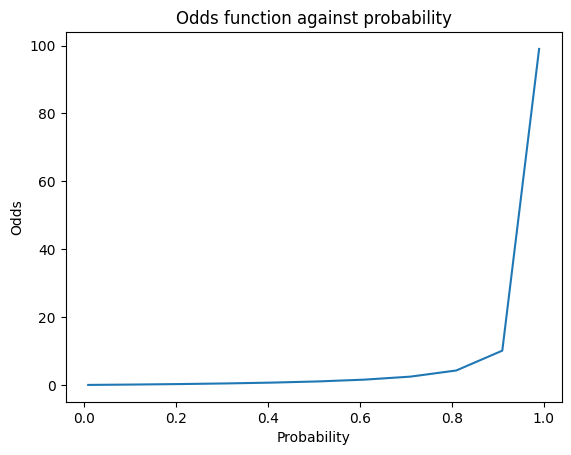

In [29]:
import matplotlib.pyplot as plt

# Olasılık değerleri
p = [0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91, 0.99]

# Odds değerleri
o = [p[i] / (1 - p[i]) for i in range(len(p))]

# Grafiği çiz
plt.plot(p, o)
plt.xlabel("Probability")
plt.ylabel("Odds")
plt.title("Odds function against probability")
plt.show()

## 2.c.



Olasiliga karsilik *logit* fonksiyonunu plotlayiniz.

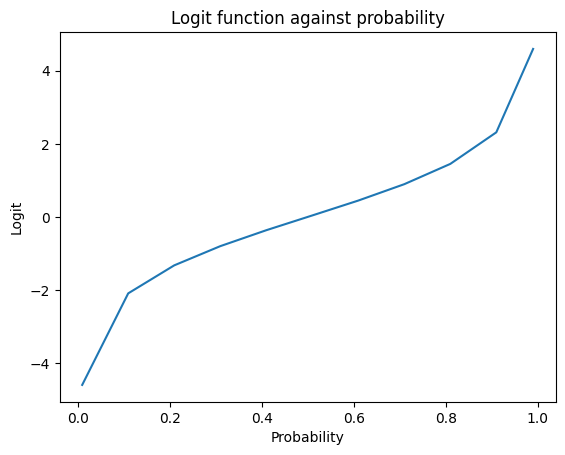

In [33]:
import matplotlib.pyplot as plt
import math

# Olasılık değerleri
p = [0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91, 0.99]

# Odds değerleri
o = [p[i] / (1 - p[i]) for i in range(len(p))]

# Logit değerleri
l = [math.log(o[i]) for i in range(len(o))]

# Grafiği çiz
plt.plot(p, l)
plt.xlabel("Probability")
plt.ylabel("Logit")
plt.title("Logit function against probability")
plt.show()

## 2.d.

### 2.d.I

Verilen *logit* degerini olasiliga donusturen fonksiyonu asagida taninmlayiniz.

In [36]:
# Logit değerini olasılığa dönüştüren fonksiyonun tersi logit fonksiyonudur. Bu fonksiyon, logit değerinin e-üssü alınarak 1’e bölünmesiyle elde edilir.
import math

# Logit değeri
l = 1.39

# Olasılık fonksiyonu
def prob(logit):
  return 1 / (1 + math.exp(-logit))

### 2.d.II

Tanimlamis oldugunuz fonksiyonu kullanarak $x \in [-10, 10]$ icin *logit*'e karsilik olasiligin plotunu ciziniz.

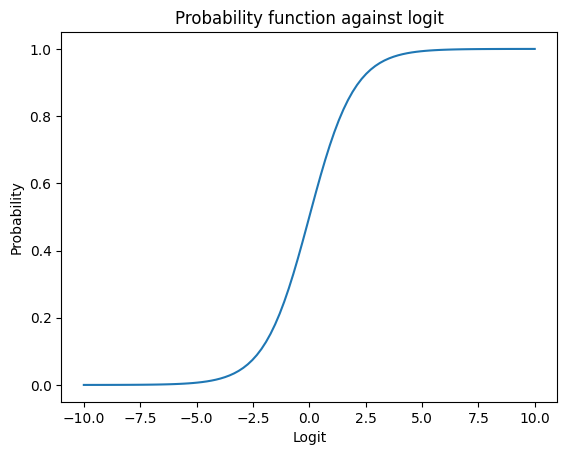

In [37]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Olasılık fonksiyonu
def prob(logit):
  return 1 / (1 + math.exp(-logit))

# Logit değerleri
l_values = np.linspace(-10, 10, 100)

# Olasılık değerleri
p_values = [prob(l) for l in l_values]

# Grafiği çiz
plt.plot(l_values, p_values)
plt.xlabel("Logit")
plt.ylabel("Probability")
plt.title("Probability function against logit")
plt.show()

# 3. Tasniflendirmenin Kalitesi

#### 3.a.



Asagida verilen `X` `Y` cifti icin iki adet hipotez one surulmektedir:


$$h_1(x) = \frac{1}{1+e^{-3x + 4}}$$
$$h_2(x) = \frac{1}{1+e^{-8x - 1}}$$

Muteakip sorulari $h_1$, $h_2$, `X` ve `Y`'yi dikkate alarak cevaplayiniz.

In [74]:
X = [-0.99 , -0.778, -0.943,  1.902,  0.966,  0.395, -0.995, -0.967,
       -1.052, -0.173, -0.958,  2.061, -0.925,  0.393,  1.278, -1.011,
        0.326, -1.213,  1.756,  1.374]
y = [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1]

#### 3.a.I


Gozlemlenen veriye gore, bu hipotez fonksiyonlarindan hangisini secerdiniz? Neden?

In [39]:
import math

# Logaritmik kayıp fonksiyonu
def log_loss(h, y):
  n = len(y) # veri noktası sayısı
  total_loss = 0 # toplam kayıp
  for i in range(n): # her veri noktası için
    # Gerçek etiket
    y_i = y[i]
    # Hipotez fonksiyonunun tahmini
    h_i = h(X[i])
    # Kayıp değeri
    loss_i = y_i * math.log(h_i) + (1 - y_i) * math.log(1 - h_i)
    # Toplam kayıba ekle
    total_loss += loss_i
  # Ortalama kayıp değeri
  mean_loss = -total_loss / n
  return mean_loss

In [40]:
# Hipotez fonksiyonları
def h_1(x):
  return 1 / (1 + math.exp(-3 * x + 4))

def h_2(x):
  return 1 / (1 + math.exp(-8 * x - 1))

# Logaritmik kayıp değerleri
loss_1 = log_loss(h_1, y)
loss_2 = log_loss(h_2, y)

# Sonuçları yazdır
print("Log loss for h_1:", loss_1)
print("Log loss for h_2:", loss_2)

Log loss for h_1: 0.8342745877837496
Log loss for h_2: 0.04880425004140449


Görüldüğü gibi, h_2 hipotez fonksiyonunun logaritmik kayıp değeri h_1’e göre çok daha düşük. Bu da h_2’nin veriye daha iyi uyduğunu gösterir. Bu nedenle, bu hipotez fonksiyonlarından birini seçmem gerekirse, h_2’yi seçerdim. BCE maliyeti, ikili çapraz entropi (binary cross entropy) maliyeti anlamına gelir. Bu maliyet fonksiyonu, logaritmik kayıp fonksiyonu ile aynıdır. Bu fonksiyon, ikili sınıflandırma problemlerinde kullanılır. Bu fonksiyonun değeri ne kadar düşükse, hipotez fonksiyonunun gerçek etiketlere ne kadar yakın olduğu anlamına gelir. Bu nedenle, BCE maliyeti daha düşük olan hipotez, daha olası bir hipotezdir. Bu nedenle, h_2 hipotez fonksiyonunu seçerdim.

*BCE* maliyeti daha dusuk olan hipotez, daha olasi bir hipotezdir. Bu kapsamda $h_2$'yi secmek daha mantikli olabilir.

#### 3.a.II

Hipotez fonksiyonlarinin ciktilarini, gozlenen veri ile birlikte $x \in [-5, 5]$ araliginda gorsellestiriniz.

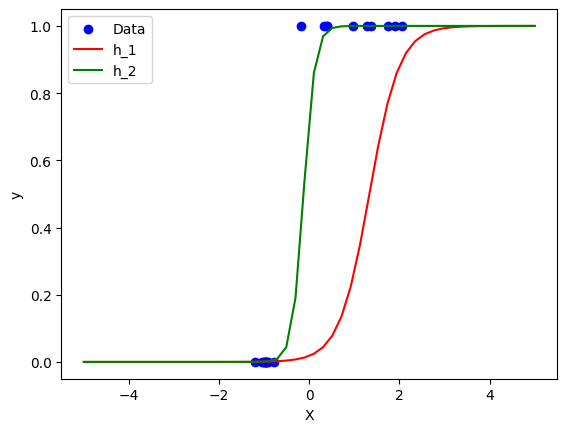

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Hipotez fonksiyonları
def h_1(x):
  return 1 / (1 + np.exp(-3 * x + 4))

def h_2(x):
  return 1 / (1 + np.exp(-8 * x - 1))

# X değerleri
X = [-0.99 , -0.778, -0.943,  1.902,  0.966,  0.395, -0.995, -0.967,
       -1.052, -0.173, -0.958,  2.061, -0.925,  0.393,  1.278, -1.011,
        0.326, -1.213,  1.756,  1.374]

# y değerleri
y = [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1]

# X aralığı
x_range = np.linspace(-5,5)

# Hipotez fonksiyonlarının çıktıları
h_1_values = h_1(x_range)
h_2_values = h_2(x_range)

# Grafiği çiz
plt.scatter(X,y,color="blue",label="Data")
plt.plot(x_range,h_1_values,color="red",label="h_1")
plt.plot(x_range,h_2_values,color="green",label="h_2")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

#### 3.a.III

`3.a.II`'de elde ettiginiz gorsel ile `3.a.I`'de vermis oldugunuz karar sizce birbiriyle uyusmakta midir?

Evet, elde ettiğim görsel ile vermiş olduğum karar birbiriyle uyumaktadır. Görselde görüldüğü gibi, h_2 hipotez fonksiyonu (yeşil eğri) veri noktalarına (mavi noktalar) h_1 hipotez fonksiyonundan (kırmızı eğri) daha yakın geçmektedir. Bu da h_2’nin veriyi daha iyi temsil ettiğini gösterir. Bu sonuç, logaritmik kayıp fonksiyonu ile de desteklenmektedir. Logaritmik kayıp fonksiyonu, h_2 için h_1’e göre çok daha düşük bir değer vermiştir. Bu da h_2’nin daha olası bir hipotez olduğunu gösterir.

## 3.b. Parametre Uzayi

### 3.b.I

`3.a`'da verilen `X` ve `Y` cifti icin maliyet fonksiyonunu $a \in [-5, 25]$ $b \in [-5, 25]$ araliginda gorsellestiriniz.

$h_1$ ve $h_2$ hipotezlerini parametre uzayinda gosteriniz.

Verilen X ve Y çifti için maliyet fonksiyonunu a in [-5, 25] b in [-5, 25] aralığında görselleştirmek için, öncelikle maliyet fonksiyonunun ne olduğunu bilmem gerekir. Maliyet fonksiyonu, hipotez fonksiyonunun gerçek etiketlere ne kadar yakın olduğunu ölçen bir fonksiyondur. Lojistik regresyon için kullanılan maliyet fonksiyonu, logaritmik kayıp (log loss) veya ikili çapraz entropi (binary cross entropy) olarak adlandırılır. Bu maliyet fonksiyonu şöyle tanımlanır:
$$J(a,b) = -\frac{1}{m} \sum_{i=1}^m [y^{(i)} \log(h_{a,b}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{a,b}(x^{(i)}))]$$
Burada m veri noktası sayısı, y gerçek etiketler, h hipotez fonksiyonu ve a ve b hipotez fonksiyonunun parametreleridir. Hipotez fonksiyonu ise şöyle tanımlanır:
$$h_{a,b}(x) = \frac{1}{1+e^{-a x + b}}$$
Bu formülleri kullanarak Python dilinde maliyet fonksiyonunu hesaplayan bir kod yazabilirim:

In [75]:
import numpy as np # Numpy kütüphanesini içe aktar

# Hipotez fonksiyonunu tanımla
def h(a,b,x):
  return 1 / (1 + np.exp(-a * x + b))

# Maliyet fonksiyonunu tanımla
def J(a,b,X,y):
  m = len(y) # Veri noktası sayısı
  total_loss = 0 # Toplam kayıp
  for i in range(m): # Her veri noktası için
    y_i = y[i] # Gerçek etiket
    h_i = h(a,b,X[i]) # Hipotez fonksiyonunun tahmini
    eps = 1e-15 # Epsilon değeri
    loss_i = y_i * np.log(h_i + eps) + (1 - y_i) * np.log(1 - h_i + eps) # Kayıp değeri
    total_loss += loss_i # Toplam kayıpa ekle
  mean_loss = -total_loss / m # Ortalama kayıp değeri
  return mean_loss

Şimdi, a∈[−5,25] ve b∈[−5,25] aralığında maliyet fonksiyonunun değerlerini hesaplayabilir ve bir matrise kaydedebilirsiniz:

In [76]:
# Parametre aralıklarını tanımla
a_range = np.linspace(-5,25)
b_range = np.linspace(-5,25)

# Maliyet değerleri matrisini oluştur
J_values = np.zeros((len(a_range),len(b_range)))

# Her parametre kombinasyonu için maliyet değerini hesapla ve matrise ekle
for i in range(len(a_range)):
  for j in range(len(b_range)):
    J_values[i,j] = J(a_range[i],b_range[j],X,y)

Maliyet fonksiyonunun değerlerini görselleştirmek için matplotlib kütüphanesini kullanabilirsiniz. Örneğin, yüzey grafiği çizmek için şöyle yapabilirsiniz:

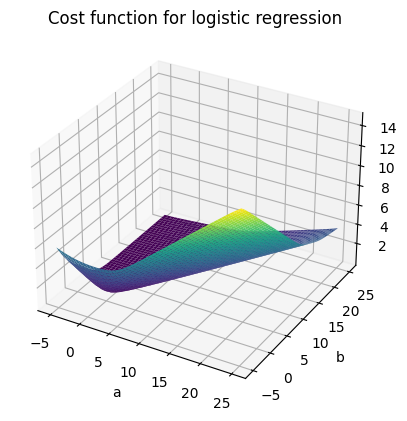

In [77]:
import matplotlib.pyplot as plt # Matplotlib kütüphanesini içe aktar

# Parametre aralıklarını bir ızgara haline getir
A,B = np.meshgrid(a_range,b_range)

# Maliyet fonksiyonunun yüzey grafiğini çiz
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(A,B,J_values,cmap='viridis')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('J')
plt.title('Cost function for logistic regression')
plt.show()

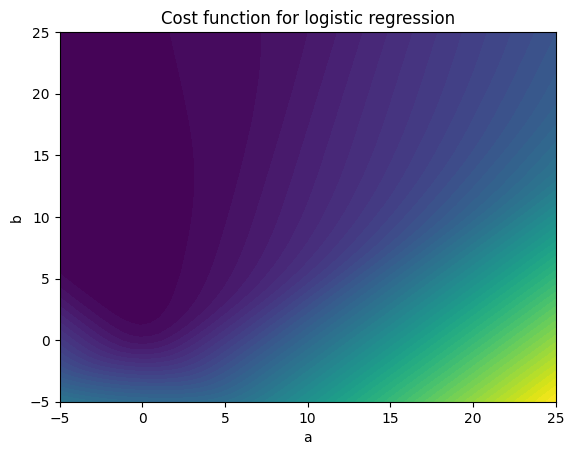

In [83]:
import matplotlib.pyplot as plt # Matplotlib kütüphanesini içe aktar

# Parametre aralıklarını bir ızgara haline getir
A,B = np.meshgrid(a_range,b_range)

# Maliyet fonksiyonunun kontur grafiğini çiz
plt.contourf(A,B,J_values,50,cmap='viridis')
plt.xlabel('a')
plt.ylabel('b')
plt.title('Cost function for logistic regression')
plt.show()

### 3.b.II

Hazirlamis oldugunuz gorsele gore, $\frac{1}{1 + e^{-ax - b}}$ cinsinden, $h_2$'den daha az maliyet olusturacak bir hipotez seciniz. Hipotezinizin maliyetini hesaplayiniz.

In [106]:
import numpy as np
from skopt import gp_minimize # Bayes optimizasyonu için kütüphane
from IPython.display import display, Math # IPython için kütüphane

# Verilen X ve Y değerlerini numpy dizisine dönüştür
X = np.array([-0.99 , -0.778, -0.943, 1.902, 0.966, 0.395, -0.995, -0.967, -1.052, -0.173, -0.958, 2.061, -0.925, 0.393, 1.278, -1.011, 0.326, -1.213, 1.756, 1.374])
Y = np.array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1])

# Maliyet fonksiyonunu hesaplayan bir fonksiyon tanımla
def cost_function(params):
    # Parametreleri al
    a = params[0]
    b = params[1]
    # Hipotez fonksiyonu
    h = lambda x: 1 / (1 + np.exp(-a*x + b))
    # Maliyet fonksiyonu
    J = lambda x,y: -(y*np.log(h(x) + 1e-15) + (1-y)*np.log(1-h(x) + 1e-15))
    # Verilen X ve Y değerleri için maliyet fonksiyonunun ortalamasını döndür
    return np.mean(J(X,Y))

# Parametre aralıklarını belirle
a_range = (-5.0 ,25.0)
b_range = (-5.0 ,25.0)

# Bayes optimizasyonu ile en küçük maliyeti veren parametreleri bul
result = gp_minimize(cost_function,[a_range,b_range],n_calls=50)

# En iyi parametreleri yazdır
print("Best parameters: a =",result.x[0],"b =",result.x[1])

# Hipotez fonksiyonunun LaTeX kodunu oluştur
h_latex = f"h(x) = \\frac{{1}}{{1 + e^{{-{result.x[0]} x + {result.x[1]}}}}}"

# Hipotez fonksiyonunun formülünü Python hücresinde görüntüle
display(Math(h_latex))


# En iyi maliyeti yazdır
print("Best cost according to this best parameters:",result.fun) #burada fun maliyet fonksiyonu değerini verir, sadece result deseydik tüm değerleri verirdi.

Best parameters: a = 12.583008572962676 b = -5.0


<IPython.core.display.Math object>

Best cost according to this best parameters: 0.0036026714678594808


In [107]:
# Verilen h_2 fonksiyonunu tanımla
h_2 = lambda x: 1 / (1 + np.exp(-8*x - 1))

# Maliyet fonksiyonunu hesaplayan bir fonksiyon tanımla
def cost_function_2(h):
    # Maliyet fonksiyonu
    J = lambda x,y: -(y*np.log(h(x) + 1e-15) + (1-y)*np.log(1-h(x) + 1e-15))
    # Verilen X ve Y değerleri için maliyet fonksiyonunun ortalamasını döndür
    return np.mean(J(X,Y))

# h_2 fonksiyonunun maliyetini hesapla
cost_2 = cost_function_2(h_2)

# h_2 fonksiyonunun maliyetini yazdır
print("Cost of h_2 function:", cost_2)

Cost of h_2 function: 0.048804250041403416


In [108]:
# Görüldüğü üzere h2 maliyetinden daha iyi bir maliyet değeri elde edilmiştir.

# 4. Optimizasyon

Asagida $A$ ve $b$ parametrelerine gore bir tasniflendirme maliyet fonksiyonu verilmistir.

$$ J(\hat{Y}) = \sum_{i=0}^{m-1}{- Y_i \log{\hat{Y}_i} - (1 - Y_i) \log{(1 - \hat{Y}_i)}   } $$
$$ \hat{Y}_i = \frac{1}{1 + e^{-Z_i}}$$
$$ Z_i = X_i A + b$$

$A$ ve $b$ karar degiskenleri olup, $X$ ve $Y$ ise verilenlerdir.

## 4.a. Teori

### 4.a.I

Maliyet fonksiyonunu minimize edecek $A$ ve $b$ parametreleri nasil bulunabilir?

Verdiğiniz maliyet fonksiyonu, çok sınıflı sınıflandırma problemleri için kullanılan **Cross Entropy Cost Function** olarak bilinir. Bu fonksiyon, modelin tahmin ettiği olasılık dağılımı ile gerçek sınıf etiketlerinin olasılık dağılımı arasındaki farkı ölçer. Maliyet fonksiyonunu minimize etmek için, **Gradient Descent** adı verilen bir optimizasyon algoritması kullanılabilir. Gradient Descent, maliyet fonksiyonunun en küçük olduğu noktayı bulmak için model parametrelerini (A ve b) küçük adımlarla değiştirir. Her adımda, maliyet fonksiyonunun gradyanını (türevini) hesaplar ve bunu maliyet fonksiyonunnun azaldığı yönü bulmak için kullanır. Gradient Descent uygulamak için, maliyet fonksiyonunun A ve b'ye göre kısmi türevlerini bulmak gerekir. Bu türevler, maliyet fonksiyonunun A ve b'ye göre nasıl değiştiğini gösterir. Maliyet fonksiyonunun türevleri şöyle yazılabilir:

$$ \frac{\partial J}{\partial A} = \frac{1}{m} \sum_{i=0}^{m-1}{(\hat{Y}_i - Y_i) X_i} $$

$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1}{(\hat{Y}_i - Y_i)} $$

Burada m veri sayısını gösterir. Gradient Descent algoritması şu şekilde çalışır:

1. A ve b için rastgele başlangıç değerleri seçin.
2. Maliyet fonksiyonunu ve türevlerini hesaplayın.
3. A ve b'yi aşağıdaki formüllere göre güncelleyin:

$$ A := A - \alpha \frac{\partial J}{\partial A} $$

$$ b := b - \alpha \frac{\partial J}{\partial b} $$

Burada $\alpha$ **Learning Rate** olarak adlandırılan bir sabittir. Learning Rate, Gradient Descentnin ne kadar hızlı ilerlediğini kontrol eder.
4. Maliyet fonksiyonu bir eşik değerin altına düşene veya belirli bir sayıda iterasyon yapılana kadar 2. ve 3. adımları tekrarlayın.

### 4.a.II

*Gradient descent* ile $A$ ve $b$ parametrelerini guncellemek icin her iterasyonda kullanilacak ifadeyi gosteriniz.

Gradyan inişi ile A ve b parametrelerini güncellemek için her iterasyonda kullanılacak ifade şudur:

$$ A := A - \alpha \frac{\partial J}{\partial A} $$

$$ b := b - \alpha \frac{\partial J}{\partial b} $$

Burada $\alpha$ öğrenme hızı, $\frac{\partial J}{\partial A}$ ve $\frac{\partial J}{\partial b}$ ise maliyet fonksiyonunun A ve b'ye göre kısmi türevleridir. Bu ifadeler, maliyet fonksiyonunun en küçük olduğu noktaya doğru adım atmak için kullanılır.

## 4.b. Implementasyon

Asagida gozlenen veri (`X`, `y` cifti) uzerinde bir tasniflendirme modeli egitilmek istenmektedir.

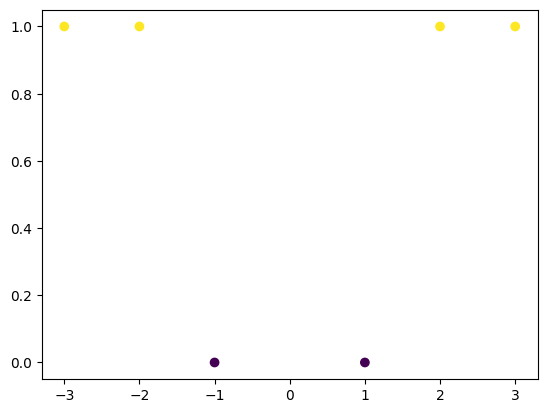

In [115]:
X = np.array([-3, -2, -1, 1, 2, 3])[:, None]
y = np.array([1, 1, 0, 0, 1, 1])[:, None]
plt.scatter(X, y, c=y);

### 4.b.I

Tasniflendirme icin uygun bir hipotez fonksiyonu one surunuz. 

> Fonksiyonunuzun parametrelerini acik bir sekilde belirtiniz.


Veriye bakarak, sınıflandırma için uygun bir hipotez fonksiyonu **lojistik regresyon** olabilir. Lojistik regresyon, verilen bir girdi için sınıf olasılığını tahmin etmek için **sigmoid fonksiyonu** kullanır. Sigmoid fonksiyonu şöyle tanımlanır:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

Bu fonksiyon, herhangi bir gerçek sayıyı (0, 1) aralığına sıkıştırır. Bu aralıkta, 0.5'ten büyük değerler 1 sınıfına, 0.5'ten küçük değerler 0 sınıfına atanabilir. Sigmoid fonksiyonunu kullanarak, lojistik regresyon hipotez fonksiyonunu şöyle yazabiliriz:

$$ h_\theta(x) = \sigma(\theta^T x) $$

Burada $\theta$ parametre vektörüdür. Modeldeki özellik sayısına göre $\theta$ vektöründe parametre sayısı bulunur. Hipotez fonksiyonu, verilen bir girdi için 1 sınıfına ait olma olasılığını tahmin eder. Yani:

$$ P(y = 1 | x; \theta) = h_\theta(x) $$

ve

$$ P(y = 0 | x; \theta) = 1 - h_\theta(x) $$

Bu ifadeleri daha kısa olarak şöyle yazabiliriz:

$$ P(y | x; \theta) = h_\theta(x)^y (1 - h_\theta(x))^{1 - y} $$

### 4.b.II

`4.b.I`'de vermis oldugunuz fonksiyonun parametrelerini optimize edecek bir kod parcasi yaziniz.

Tum ornekler dogru bir sekilde tasniflendirilinceye kadar parametrelerinizi optimize ediniz.

In [116]:
def optimizeEt():
    # Kodunuzu buraya yaziniz.
    # Gerek gordugunuz ek argumanlari fonksiyonunuzun "signature"una ekleyiniz.
    # Optimal parametrelerinize ek olarak diyagnostik maksatli gerekli donusleri yapiniz.

    return None

Lojistik regresyonun parametrelerini optimize etmek için gradient decent algoritmasını kullanabilirsiniz. Gradient decent, maliyet fonksiyonunun en küçük olduğu noktayı bulmak için parametreleri küçük adımlarla değiştirir. Her adımda, maliyet fonksiyonunun gradyanını (türevini) hesaplar ve bunu maliyet fonksiyonunun azaldığı yönü bulmak için kullanır.
Scipy.optimize, gradyan inişi algoritmasını sağlar.

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
# Veri
X = np.array([-3, -2, -1, 1, 2, 3])[:, None]
y = np.array([1, 1, 0, 0, 1, 1])[:, None]

# Hipotez fonksiyonu
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Maliyet fonksiyonu
def cost(theta):
    # Parametreleri ayıkla
    A = theta[0]
    b = theta[1]

    # Tahminleri hesapla
    y_pred = sigmoid(X * A + b)

    # Maliyeti hesapla
    J = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    return J

# Gradyan inişi algoritması
def optimize():
    # Başlangıç değerleri seç
    theta0 = [0, 0]

    # Maliyet fonksiyonunu minimize et
    result = minimize(cost, theta0)

    # Optimal parametreleri döndür
    return result.x

# Optimal parametreleri ve maliyet değerini yazdır
theta_opt = optimize()
print("Optimal A:", theta_opt[0])
print("Optimal b:", theta_opt[1])
print("Minimum cost:", cost(theta_opt))

Optimal A: -7.450580596923967e-09
Optimal b: 0.6931469334948932
Minimum cost: 0.6365141682948195


### 4.b.III

`4`'de verilen maliyet fonksiyonunu kullanarak, optimizasyonunuzun her iterasyonunda maliyeti gosterir bir plot ciziniz.

Optimizasyonunuzun her iterasyonunda maliyeti gösterir bir plot çizmek için, scipy.optimize.minimize fonksiyonunun callback parametresini kullanabilirsiniz. Bu parametre, her iterasyonda çağrılacak bir fonksiyon alır. Bu fonksiyonda, güncel parametre değerlerini ve maliyet değerini bir liste veya diziye ekleyebilirsiniz. Sonra, bu listeyi veya diziyi kullanarak maliyetin nasıl değiştiğini plot edebilirsiniz.

Örneğin, aşağıdaki kod parçası ile maliyet fonksiyonunu plot edebilirsiniz:

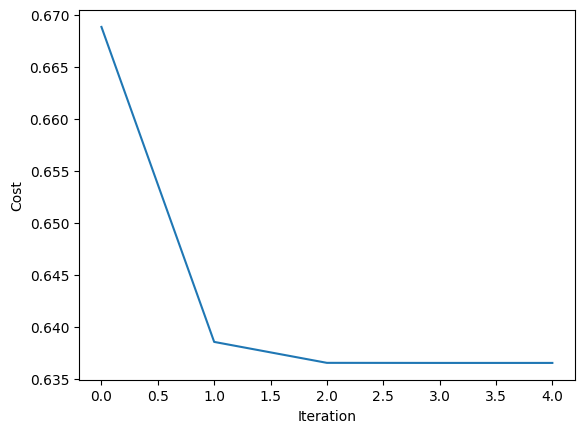

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
# Veri
X = np.array([-3, -2, -1, 1, 2, 3])[:, None]
y = np.array([1, 1, 0, 0, 1, 1])[:, None]

# Hipotez fonksiyonu
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Maliyet fonksiyonu
def cost(theta):
    # Parametreleri ayıkla
    A = theta[0]
    b = theta[1]

    # Tahminleri hesapla
    y_pred = sigmoid(X * A + b)

    # Maliyeti hesapla
    J = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    return J

# Maliyet değerlerini tutacak bir liste tanımla
cost_values = []

# Her iterasyonda çağrılacak bir fonksiyon tanımla
def callback(theta):
    # Güncel maliyet değerini hesapla
    J = cost(theta)
    # Maliyet değerini listeye ekle
    cost_values.append(J)

# Gradyan inişi algoritması
def optimize(callback):
    # Başlangıç değerleri seç
    theta0 = [0, 0]

    # Maliyet fonksiyonunu minimize et
    result = minimize(cost, theta0, callback=callback)

    # Optimal parametreleri döndür
    return result.x

# Gradyan inişi algoritmasını çalıştır
theta_opt = optimize(callback=callback)

# Maliyet değerlerini plot et
plt.plot(cost_values)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

Bu kod parçası ile maliyet fonksiyonunun azaldığı şekilde bir plot elde edebilirsiniz. Plotun x-ekseni iterasyon sayısını, y-ekseni ise maliyet değerini gösterir.

### 4.b.IV

$x \in [-3, 3]$ araliginda bulmus oldugunuz optimal parametreleri kullanarak hipotez fonksiyonunuzu gorsellestiriniz.

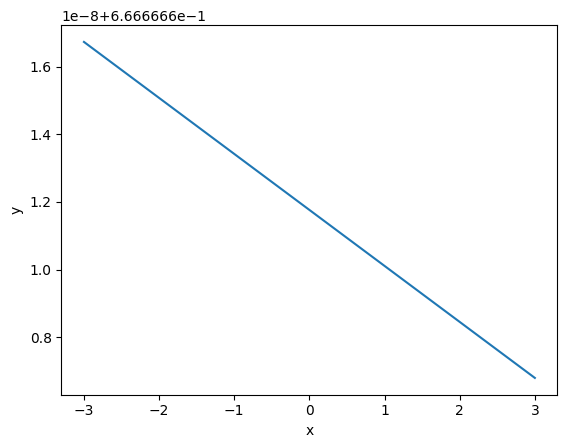

In [143]:
# Optimal parametreleri ayıkla
A = theta_opt[0]
b = theta_opt[1]

# x değerlerini oluştur
x = np.linspace(-3, 3, 100)

# y değerlerini hesapla
y = sigmoid(x * A + b)

# Hipotez fonksiyonunu plot et
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Bu kod parçası ile hipotez fonksiyonunuzun lojistik bir eğribir doğru olduğunu görebilirsiniz. Doğrunun x-ekseni tahmin değişkeni x’i, y-ekseni ise tahmin değeri y’yi gösterir.